# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Business Objectives**

The objective of this project is to create a predictive model to estimate the used car prices, enabling dealerships to better serve their customers. By analyzing the provided dataset, we aim to identify key factors that impact resale prices and influence consumer purchasing decisions. 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [185]:
df = pd.read_csv("data/vehicles.csv")

In [136]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [11]:
print("Number of rows and columns in the dataset:")
print(df.shape)

Number of rows and columns in the dataset:
(426880, 18)


In [12]:
print("Dataset summary")
print(df.info())

Dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  o

In [ ]:
# Count missing values
print(df.isnull().sum())


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


<font color="lightgreen">**Observations**: </font>

The "Size" column has the highest number of null values, with nearly 75% of rows missing data. 

Other features, including "condition", "Cylinders", "VIN", and "drive" also have a significant number of null values.

In [ ]:
# shows number of unique values in each column
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

<font color="lightgreen">**Observations**: </font>

The "model" column has approximatly 30K unique values, so we may consider ignoring this feature.

In [15]:
print("Descriptive statistics for numerical variables")
df.describe()

Descriptive statistics for numerical variables


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [16]:
print("Descriptive statistics for categorical variables")
df.describe(include=['object', 'category'])

Descriptive statistics for categorical variables


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [ ]:
# find the number of records with value 0
df.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

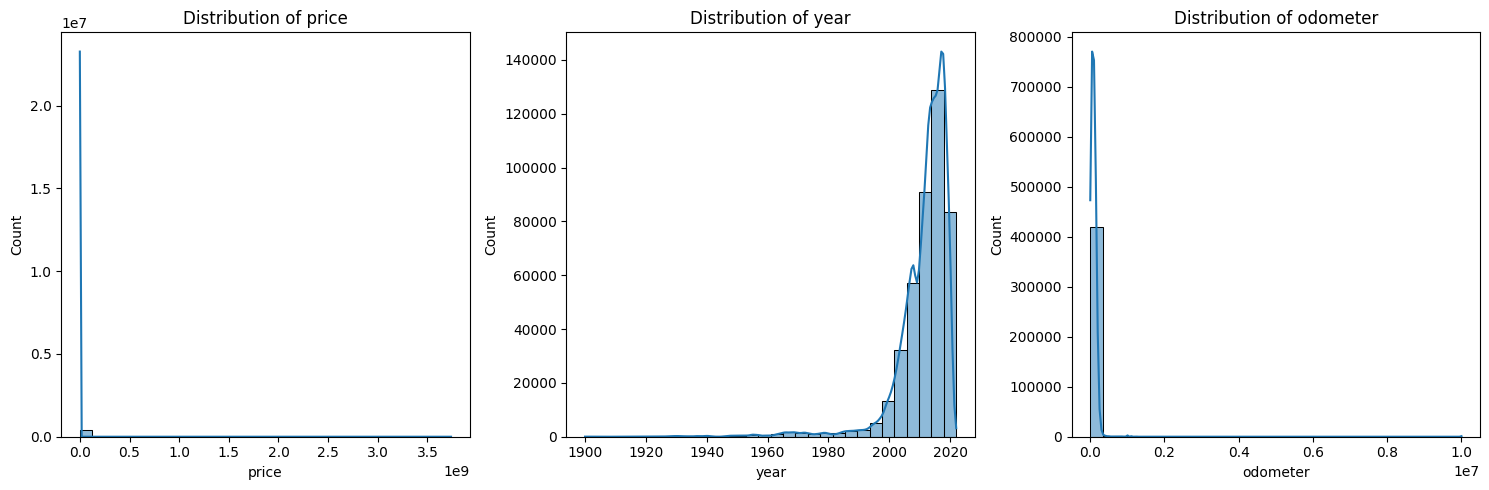

In [ ]:

# explore distribution of numerical features
numerical_features = ['price', 'year', 'odometer']
plt.figure(figsize=[15, 5])
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<font color="lightgreen">**Observations**: </font>

The “price” column contains approximately 30k rows with zero values, resulting in a distribution skewed toward zero.

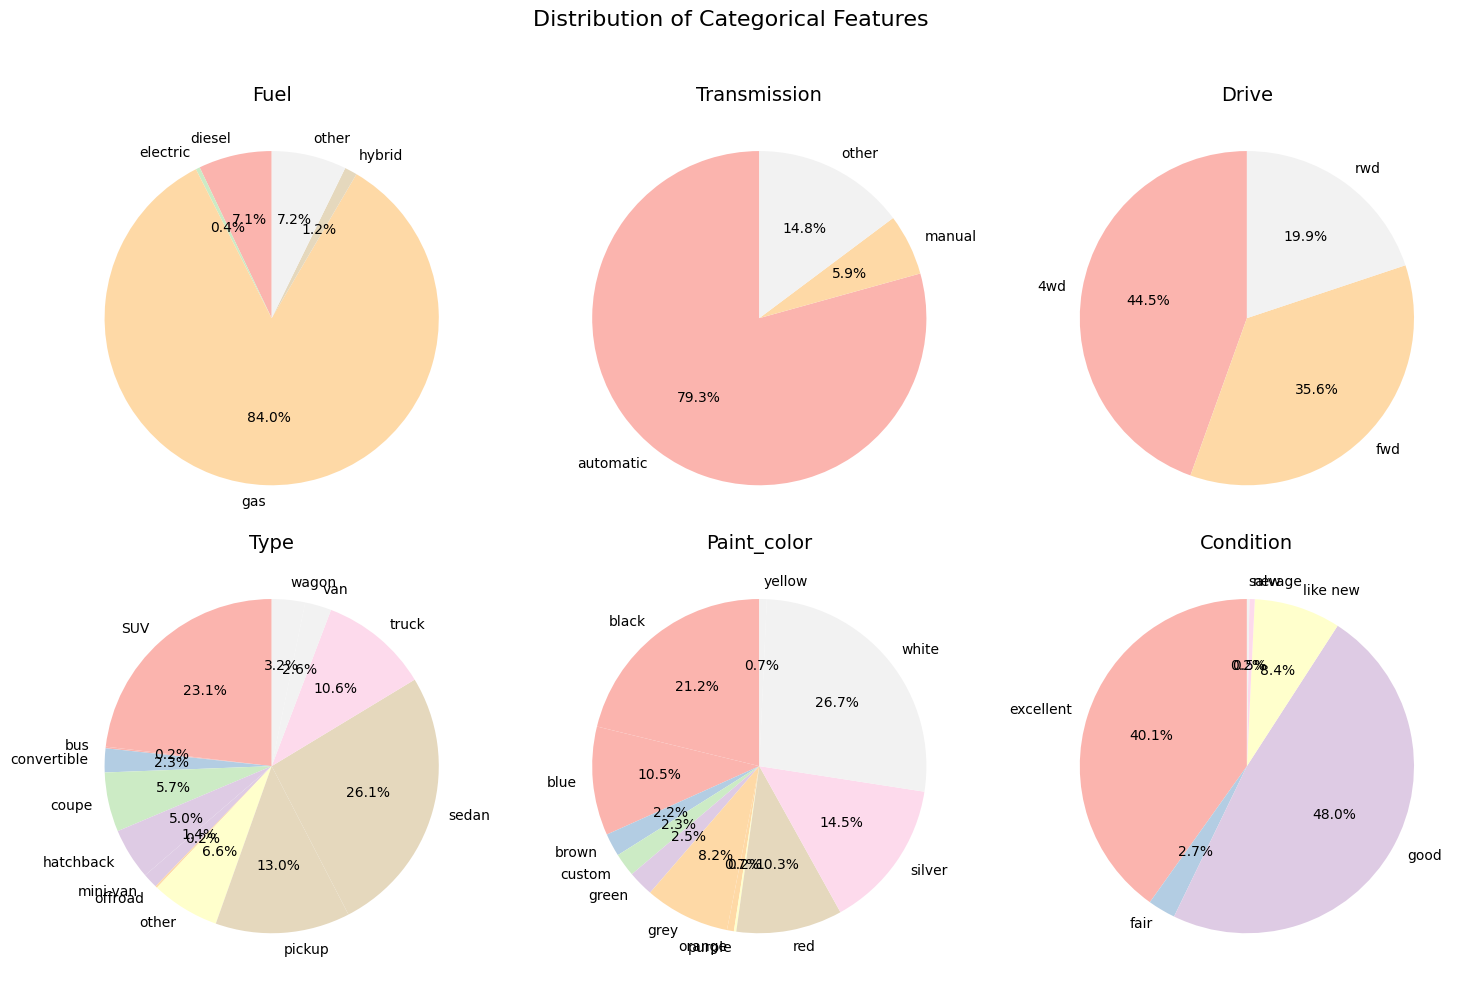

In [172]:
# explore categorical features
categorical_features = [ 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'condition']

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
fig.suptitle("Distribution of Categorical Features", fontsize=16)

colormap = plt.get_cmap('Pastel1')

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)  
    ax = axes[row, col] 
    
    df.groupby(feature).size().plot(
        kind='pie', autopct='%1.1f%%', startangle=90, cmap=colormap, ax=ax
    )
    
    ax.set_title(f"{feature.capitalize()}", fontsize=14)
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [173]:
df.groupby('title_status').size()

title_status
clean         405117
lien            1422
missing          814
parts only       198
rebuilt         7219
salvage         3868
dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [186]:
# dropping unnecessary columns
# We will remove the following columns: size, model, VIN, and id for the following reasons:
# size: Contains nearly 75% missing values.
# model: Has around 30k unique non-numeric values, making it less useful for modeling.
# region: Has 404 unique non-numeric values, making it less useful for modeling.
# id and VIN: Unlikely to impact the price of used cars.

df.drop(columns=['size', 'model', 'region', 'id', 'VIN'], inplace=True)

In [187]:
# drop mising values
df = df.dropna()

In [188]:
# function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # filter out the rows that are outside the bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

In [189]:
# remove outliers in price and odometer
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'odometer')

In [190]:
count_zero_price = df[df['price'] == 0].shape[0]

# print the count
print(count_zero_price)

4341


In [191]:
# filter out cars with zero price
df = df[df['price'] > 0]
df.shape

(109346, 13)

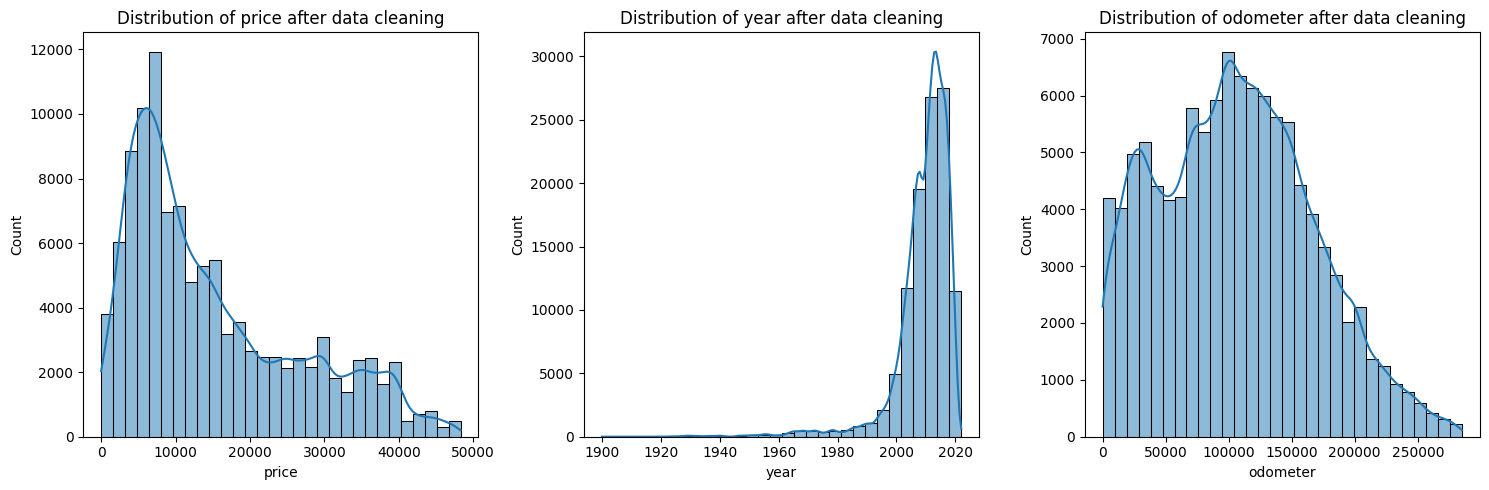

In [192]:
# distribution of numerical features after data cleaning
numerical_features = ['price', 'year', 'odometer']
plt.figure(figsize=[15, 5])
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} after data cleaning')
plt.tight_layout()
plt.show()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109346 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         109346 non-null  int64  
 1   year          109346 non-null  float64
 2   manufacturer  109346 non-null  object 
 3   condition     109346 non-null  object 
 4   cylinders     109346 non-null  object 
 5   fuel          109346 non-null  object 
 6   odometer      109346 non-null  float64
 7   title_status  109346 non-null  object 
 8   transmission  109346 non-null  object 
 9   drive         109346 non-null  object 
 10  type          109346 non-null  object 
 11  paint_color   109346 non-null  object 
 12  state         109346 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 11.7+ MB


In [194]:
# converts categorical values into numerical representations

from sklearn.preprocessing import LabelEncoder

categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded = df_encoded.reset_index(drop=True)

In [195]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109346 entries, 0 to 109345
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         109346 non-null  int64  
 1   year          109346 non-null  float64
 2   manufacturer  109346 non-null  int64  
 3   condition     109346 non-null  int64  
 4   cylinders     109346 non-null  int64  
 5   fuel          109346 non-null  int64  
 6   odometer      109346 non-null  float64
 7   title_status  109346 non-null  int64  
 8   transmission  109346 non-null  int64  
 9   drive         109346 non-null  int64  
 10  type          109346 non-null  int64  
 11  paint_color   109346 non-null  int64  
 12  state         109346 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 10.8 MB


In [197]:
df.shape

(109346, 13)

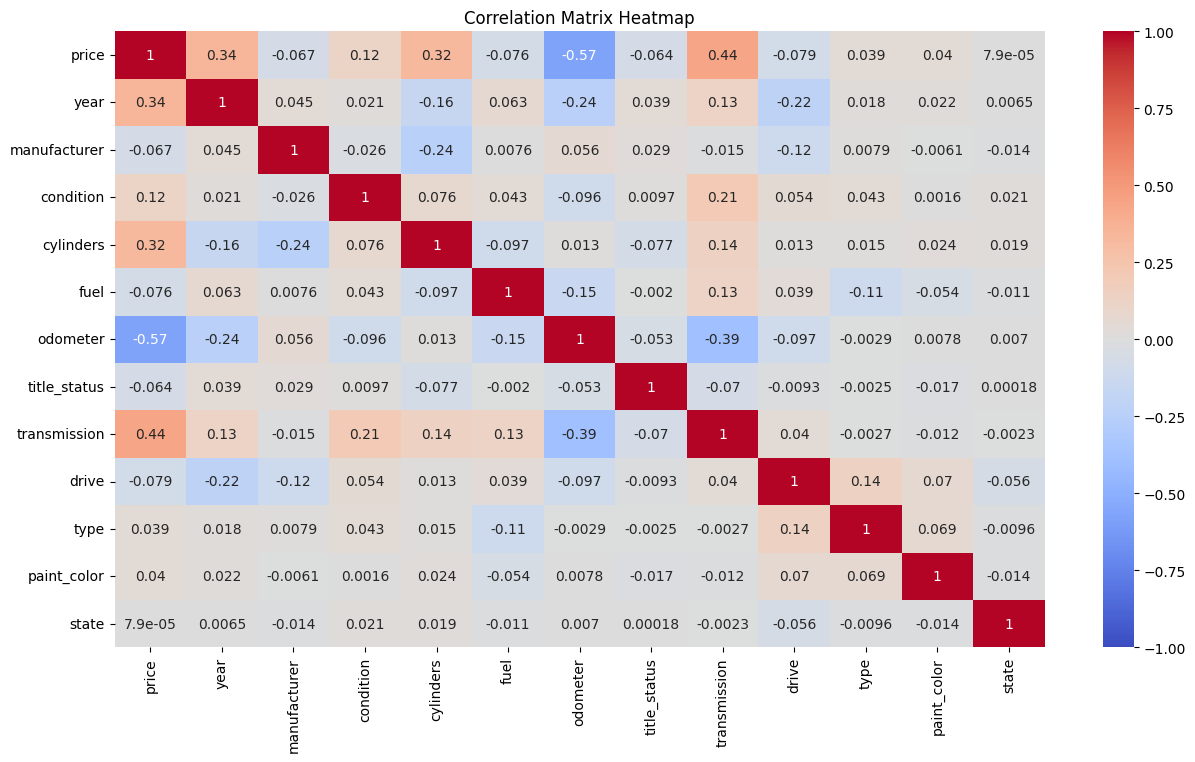

In [196]:
# analyze feature correlations

plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<font color="lightgreen">**Observations**: </font>

From the above corrrelation matrix we can see that there is no strong linear correlation (coefficient > 0.7) between any variables. However, price shows a positive correlation with transmission, year, cylinders, and condition, while it is negatively correlated with odometer readings.

In [ ]:
# data with reduced features
df = df[['price', 'year', 'condition', 'cylinders', 'odometer', 'title_status', 'transmission','type']]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109346 entries, 31 to 426878
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         109346 non-null  int64  
 1   year          109346 non-null  float64
 2   condition     109346 non-null  object 
 3   cylinders     109346 non-null  object 
 4   odometer      109346 non-null  float64
 5   title_status  109346 non-null  object 
 6   transmission  109346 non-null  object 
 7   type          109346 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.5+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Splitting Data into Training and Test Sets 

In [198]:
from sklearn.model_selection import train_test_split

In [228]:
# Define features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price'] 

In [229]:
# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [230]:
X_train.head()

,year,condition,cylinders,odometer,title_status,transmission,type
72671,2013.0,good,8 cylinders,170000.0,clean,automatic,truck
146812,2011.0,good,6 cylinders,98238.0,clean,automatic,convertible
185998,2018.0,salvage,4 cylinders,56000.0,salvage,automatic,sedan
297730,2014.0,like new,4 cylinders,124000.0,clean,automatic,sedan
21468,2011.0,good,6 cylinders,156612.0,clean,automatic,sedan


In [231]:
y_train.head()

72671     10500
146812    16985
185998     9995
297730     1000
21468     10495
Name: price, dtype: int64

In [232]:
X_test.head()

,year,condition,cylinders,odometer,title_status,transmission,type
155643,2018.0,excellent,6 cylinders,71335.0,clean,automatic,truck
209317,2011.0,good,8 cylinders,51086.0,clean,automatic,convertible
233236,2017.0,excellent,4 cylinders,27519.0,rebuilt,automatic,SUV
104790,2000.0,excellent,8 cylinders,105312.0,clean,automatic,SUV
225336,2012.0,excellent,8 cylinders,115000.0,clean,automatic,pickup


In [233]:
y_test.head()

155643    31580
209317    30990
233236    23997
104790     9900
225336    19800
Name: price, dtype: int64

#### Baseline Predictions

In [ ]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train: .2f}')
print(f'Baseline for testing data: {mse_baseline_test: .2f}')


(87476,) (21870,)
Baseline for training data:  131554086.20
Baseline for testing data:  133137252.13


#### Feature Engineering

In [ ]:
# Define numerical and categorical features
numerical_columns = ['year', 'odometer']
ordinal_columns = ['condition', 'cylinders']
nominal_columns = ['title_status', 'transmission', 'type']

In [206]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [269]:
# Create a preprocessor that applies both one-hot and ordinal encoding for categorical variables 
# and scaling for numerical variables

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns), 
        ('ordinal', OrdinalEncoder(), ordinal_columns), 
        ('nominal', OneHotEncoder(sparse_output=False), nominal_columns)  
    ])


In [270]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [271]:
X_train_processed

array([[ 0.38282534,  1.04859154,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.1776184 , -0.12511854,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.89584272, -0.8159461 ,  5.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.4640372 , -0.50518982,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.02758855, -0.52972321,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28022187, -0.57546981,  2.        , ...,  0.        ,
         0.        ,  0.        ]])

In [272]:
name_nominal_columns = preprocessor.named_transformers_['nominal'].get_feature_names_out(nominal_columns)
name_all_columns = numerical_columns + ordinal_columns + list(name_nominal_columns)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=name_all_columns)
X_train_processed_df.head()

,year,odometer,condition,cylinders,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.382825,1.048592,2.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.177618,-0.125119,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.895843,-0.815946,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.485429,0.296234,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.177618,0.829623,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Model 1: Linear Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import set_config
set_config(display="diagram")

In [289]:
pipe_ols = Pipeline([('preprocessor', preprocessor), 
                     ('linreg', LinearRegression())])
pipe_ols.fit(X_train, y_train)
pred_train = pipe_ols.predict(X_train)
pred_test = pipe_ols.predict(X_test)

pipe_ols


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['condition', 'cylinders']),
                                                 ('nominal',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['title_status',
                                                   'transmission', 'type'])])),
                ('linreg', LinearRegression())])

In [ ]:
mse_train_pipe_ols = mean_squared_error(y_train, pred_train)
mse_test_pipe_ols = mean_squared_error(y_test, pred_test)

print(f'Train MSE: {mse_train_pipe_ols: .2f}')
print(f'Test MSE: {mse_test_pipe_ols: .2f}')

Train MSE:  51131770.42
Test MSE:  52290114.33


#### Model 2: Linear Regression and Polynomial Features

In [283]:
from sklearn.preprocessing import PolynomialFeatures

In [291]:
pipe_ols_poly = Pipeline([('preprocessor', preprocessor), 
                          ('poly_features', PolynomialFeatures(degree = 2, include_bias= False)),
                          ('linreg', LinearRegression())])
pipe_ols_poly.fit(X_train, y_train)
pred_train = pipe_ols_poly.predict(X_train)
pred_test = pipe_ols_poly.predict(X_test)

pipe_ols_poly

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['condition', 'cylinders']),
                                                 ('nominal',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['title_status',
                                                   'transmission', 'type'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])

In [292]:
mse_train_pipe_ols_poly = mean_squared_error(y_train, pred_train)
mse_test_pipe_ols_poly = mean_squared_error(y_test, pred_test)

print(f'Train MSE: {mse_train_pipe_ols_poly: .2f}')
print(f'Test MSE: {mse_test_pipe_ols_poly: .2f}')

Train MSE:  36257114.37
Test MSE:  166851776276582792953856.00


In [ ]:
# Models with polynomial feature with degree of 1 - 3
train_mses = []
test_mses = []
for i in range(1, 4):
    pipe = Pipeline([('preprocessor', preprocessor), 
                          ('poly_features', PolynomialFeatures(degree = i, include_bias= False)),
                          ('linreg', LinearRegression())])

    pipe.fit(X_train, y_train)
    p1 = pipe.predict(X_train)
    p2 = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

pd.DataFrame({
    'Train MSEs': train_mses,
    'Test MSEs': test_mses
})

,Train MSEs,Test MSEs
0,5.113177e+07,5.229011e+07
1,3.625711e+07,1.668518e+23
2,3.024921e+07,1.560391e+22


<font color="lightgreen">**Observations**: </font>

We can see that degree of 1 yields the best model.

#### Ridge Model with Small Regularization Penalty


In [296]:
from sklearn.linear_model import Ridge

In [298]:
pipe_ridge_low = Pipeline([('preprocessor', preprocessor), 
                     ('ridge_low', Ridge(alpha = 0.1))])
pipe_ridge_low.fit(X_train, y_train)
pred_train = pipe_ridge_low.predict(X_train)
pred_test = pipe_ridge_low.predict(X_test)

pipe_ridge_low

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['condition', 'cylinders']),
                                                 ('nominal',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['title_status',
                                                   'transmission', 'type'])])),
                ('ridge_low', Ridge(alpha=0.1))])

In [299]:
mse_train_ridge_low = mean_squared_error(y_train, pred_train)
mse_test_ridge_low = mean_squared_error(y_test, pred_test)

print(f'Train MSE: {mse_train_ridge_low: .2f}')
print(f'Test MSE: {mse_test_ridge_low: .2f}')

Train MSE:  51129300.72
Test MSE:  52296954.12


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.